In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

from OneCyclePolicyScheduler import OneCyclePolicyScheduler

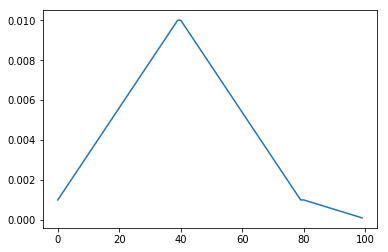

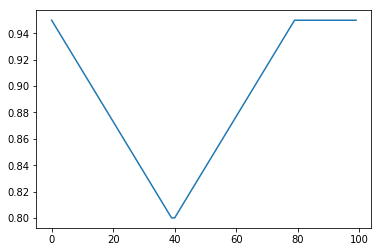

In [2]:
dummy_net_1 = nn.Sequential(nn.Linear(3,2))
total_batch_count = 100
#Dummy net assuming max_lr=1e-2 got it from lr_finder (https://arxiv.org/abs/1506.01186)
max_lr = 1e-2
optimizer = optim.SGD(dummy_net_1.parameters(),lr=1e-3,momentum=0.9)
scheduler = OneCyclePolicyScheduler(optimizer, max_lr, total_batch_count)

lrs= []
momentums = []
for i in range(total_batch_count):
    optimizer.step()
    scheduler.step()
    for param_group in optimizer.param_groups:
        lrs.append(param_group['lr'])
        momentums.append(param_group['momentum'])
plt.plot(lrs)
plt.show()
plt.plot(momentums)
plt.show()